In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mrobotics.piecewise.cubic_onepiece import spline_2d_onepiece

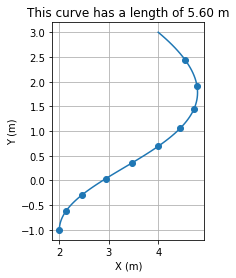

In [2]:
p0 = [2,-1.0]
v0 = [0, 3]
p1 = [4,3]
v1 = [-6.0,5.0]
t0, t1 = 0.2, 1.5 # larger time gap leads to more bendy curve...
my_curve = spline_2d_onepiece(t0=t0, t1=t1)
my_curve.fit_pos_vel_ends(p0, v0 ,p1, v1)

_, ax = plt.subplots()
my_curve.vis_curve(ax=ax, marker='o', markevery=10)
ax.set_aspect('equal')
ax.grid('major')
ax.set_title(f'This curve has a length of {my_curve.calc_arc_length():.2f} m')
plt.show()

## More validation

In [3]:
my_curve.normalize_parameter(np.linspace(t0,t1,10))

array([0.        , 0.11111111, 0.22222222, 0.33333333, 0.44444444,
       0.55555556, 0.66666667, 0.77777778, 0.88888889, 1.        ])

In [4]:
my_curve.coeff

array([[  2. ,  -1. ],
       [  0. ,   3.9],
       [ 13.8,  -2.3],
       [-11.8,   2.4]])

In [5]:
num_samples = 10+1 # to exaggrate the effect
t_eval = np.linspace(t0,t1, num_samples)
delta_t = t_eval[1]-t_eval[0]
print(t_eval)

[0.2  0.33 0.46 0.59 0.72 0.85 0.98 1.11 1.24 1.37 1.5 ]


### validation of the tangent vector

In [6]:
velocity = my_curve.get_tang(t_eval)
print(velocity[:5])

[[0.         3.        ]
 [1.85076923 2.70153846]
 [3.15692308 2.51384615]
 [3.91846154 2.43692308]
 [4.13538462 2.47076923]]


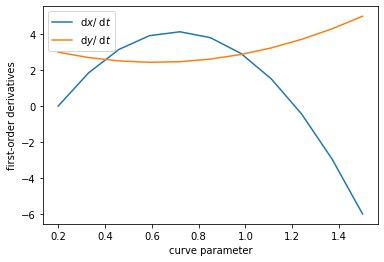

In [7]:
# inspect whether it is quadratic wrt to the curve parameter
plt.plot(t_eval, velocity[:,0], label="d$x$/ d$t$")
plt.plot(t_eval, velocity[:,1], label="d$y$/ d$t$")
plt.xlabel('curve parameter')
plt.ylabel('first-order derivatives')
plt.legend()
plt.show()

In [8]:
# inspection by integration (which shall help discover bugs)
xy_by_integration = np.zeros((num_samples,2))
xy_by_integration[0] = p0
for i in range(1, num_samples): 
    xy_by_integration[i] = xy_by_integration[i-1] + 0.5*(velocity[i-1]+velocity[i])*delta_t

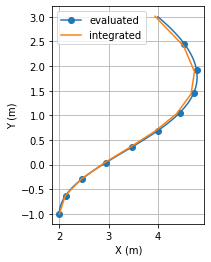

In [9]:
_, ax = plt.subplots()
my_curve.vis_curve(ax=ax, marker='o', markevery=10, label="evaluated")
ax.plot(*xy_by_integration.T, label="integrated")
ax.set_aspect('equal')
ax.grid('major')
ax.legend()
plt.axis()
plt.show()

### validation of the second order derivatives

In [10]:
test_second_order = my_curve.get_deri_tang(t_eval)

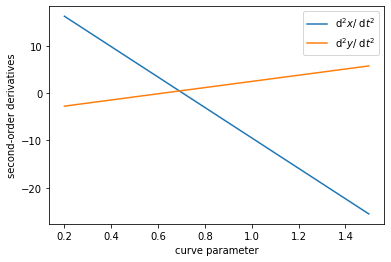

In [11]:
# inspect whether it is linear wrt to the curve parameter
plt.plot(t_eval, test_second_order[:,0], label="d$^2 x$/ d$t^2$")
plt.plot(t_eval, test_second_order[:,1], label="d$^2 y$/ d$t^2$")
plt.xlabel('curve parameter')
plt.ylabel('second-order derivatives')
plt.legend()
plt.show()

In [12]:
# inspection by integration (which shall help discover bugs)
tang_vec_by_integration = np.zeros((num_samples,2))
tang_vec_by_integration[0] = velocity[0]
for i in range(1, num_samples): 
    tang_vec_by_integration[i] = tang_vec_by_integration[i-1] + 0.5*(test_second_order[i-1]+test_second_order[i])*delta_t

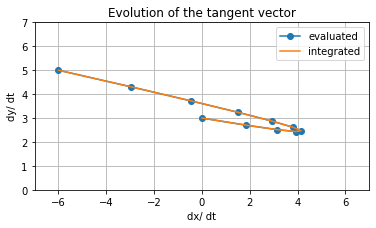

In [13]:
_, ax = plt.subplots()
ax.plot(*velocity.T,marker='o', label="evaluated")
ax.plot(*tang_vec_by_integration.T, label="integrated")
ax.set_title('Evolution of the tangent vector')
ax.set_aspect('equal')
ax.grid('both')
ax.legend()
plt.xlabel('dx/ dt')
plt.ylabel('dy/ dt')
plt.xlim([-7,7])
plt.ylim([0,7])
plt.axis()
plt.show()

### validation of the curvature - tangent calculation

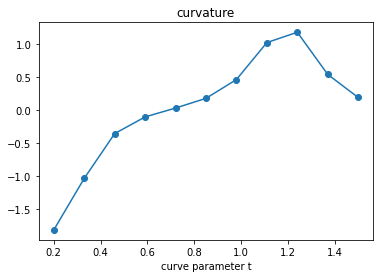

In [14]:
velocity_another, curvature = my_curve.get_tang_curvature(t_eval)
assert np.allclose(velocity, velocity_another)
plt.plot(t_eval, curvature, marker='o')
plt.title('curvature')
plt.xlabel('curve parameter t')
plt.show()
# correct sign? yes!